Matplotlib HW

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


In [70]:
# Study data files

mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [71]:
# Read mouse data and study results

mouse_data = pd.read_csv(mouse_metadata_path)
results_data = pd.read_csv(study_results_path)

In [72]:
# Show mouse data table

mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [73]:
# Show results data table

results_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [74]:
# Combine into single data and display table

merged_data = pd.merge(mouse_data, results_data, on="Mouse ID", how="outer")

merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint


duplicate_data = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]

duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [76]:
# Optional : Get all the data for the duplicate mouse ID

all_duplicated_data = merged_data[merged_data.duplicated(["Mouse ID"])]

all_duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

cleaned_data = merged_data.drop_duplicates(["Mouse ID","Timepoint"])

cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [78]:
# Checking the number of mice in the clean DataFrame
# Looking for 249 Total Mice

cleaned_data["Mouse ID"].value_counts()

f545    10
a897    10
b559    10
y769    10
x402    10
        ..
b447     1
o848     1
l872     1
x226     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [79]:
# SUMMARY STATISTICS

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol_mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_vol_median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_variance = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_sd = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

tumor_vol_stats = pd.DataFrame({"Mean": tumor_vol_mean, "Median": tumor_vol_median, "Variance": tumor_vol_variance,
                               "Standard Deviation": tumor_vol_sd, "Standard Error Of Mean": tumor_vol_sem})



In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol_stats



,Mean,Median,Variance,Standard Deviation,Standard Error Of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [81]:
# Using the aggregation method, produce the same summary statistics in a single line

agg_method = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

agg_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

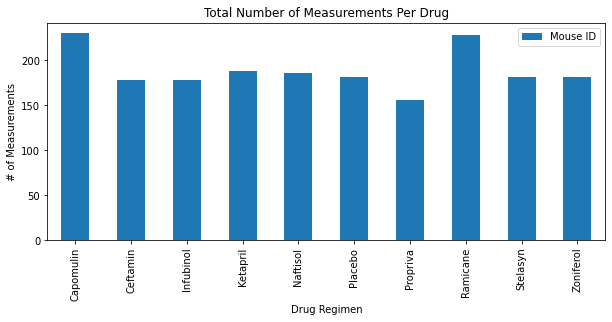

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [82]:
# BAR AND PIE CHARTS

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas. DataFrame.plot()

# Create a data frame that represents the count of measurements (grouped by drug regimen)
count_of_data = pd.DataFrame(cleaned_data.groupby(["Drug Regimen"]).count()).reset_index()

# Grab needed columns for bar plot and set to new variable
count_of_measurements = count_of_data[["Drug Regimen", "Mouse ID"]]

# Reset index so you can still grab Drug Regimen column but then reset it for x-axis label
count_of_measurements = count_of_measurements.set_index("Drug Regimen")

# Create bar plot using pandas dataframe

count_of_measurements.plot(kind="bar", figsize=(10,4))
plt.title("Total Number of Measurements Per Drug")
plt.ylabel("# of Measurements")
plt.show()
plt.tight_layout

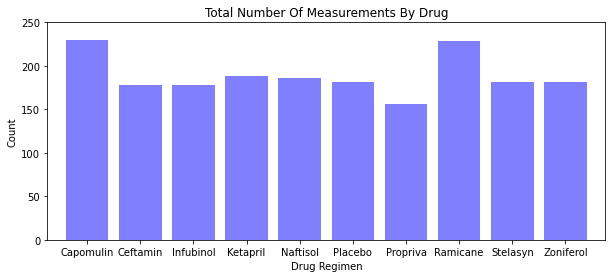

In [83]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# First you need to convert the count and drug regimen into a list

drug_list = tumor_vol_stats.index.to_list()
regimen_count = count_of_measurements["Mouse ID"].to_list()

x_axis = np.arange(len(regimen_count))

# Create bar chart 

plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color="blue", alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_list)

# Adjust limits

plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0,250)

plt.title("Total Number Of Measurements By Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show()


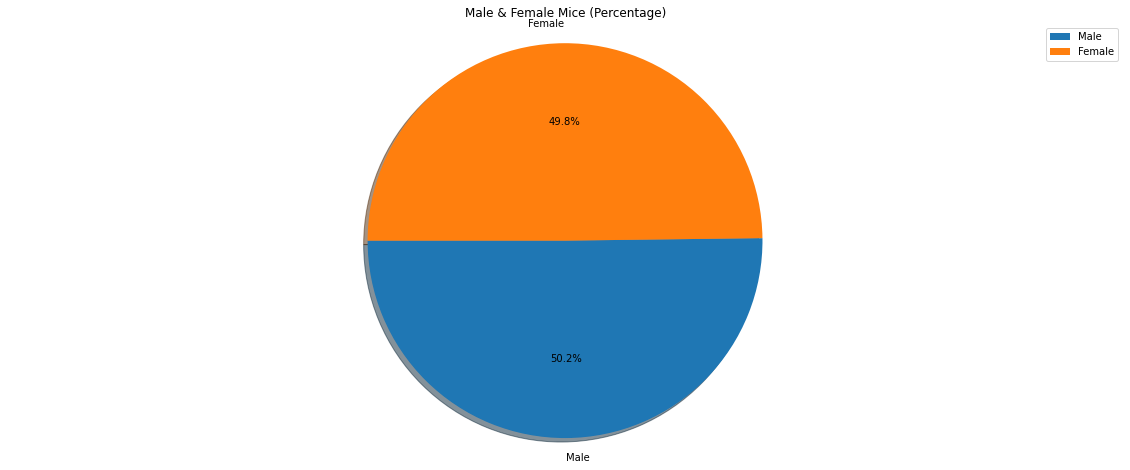

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get the count of sex and create into a dataframe
count_of_gender = mouse_data["Sex"].value_counts()
count_df = pd.DataFrame(count_of_gender)


# Create bar plot using pandas dataframe

genders = ["Male", "Female"]

plt.figure(figsize=(20,8))
count_of_gender.plot(kind="pie", y="Sex", labels=genders, autopct="%1.1f%%",
                     startangle=180, shadow=True, legend=True)
plt.title("Male & Female Mice (Percentage)")
plt.xlabel("")
plt.ylabel("")
plt.axis("equal")
plt.show()



<ipython-input-85-4a85a80c3c3e>:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(count_df, explode=explode, labels=genders,


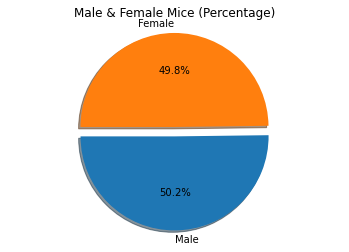

In [85]:
# # Generate a pie plot showing the distribution of female versus male mice using pyplot


# Set explode if wanted in chart

explode = (0.1,0)

# # Make piechart

plt.pie(count_df, explode=explode, labels=genders, 
        autopct="%1.1f%%", shadow=True, startangle=180)

plt.title("Male & Female Mice (Percentage)")
plt.xlabel("")
plt.ylabel("")
plt.axis("equal")
plt.show()


In [86]:
# QUARTILES, OUTLIERS, AND BOXPLOTS

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = cleaned_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

last_timepoint_merged = last_timepoint.merge(cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

last_timepoint_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [87]:
# Pull out all 4 drugs from above data frame to get final tumor volume of each mouse

top_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

final_vol_top_drugs = []


for drug in top_drugs:
    drug_vol = last_timepoint_merged.loc[(last_timepoint_merged["Drug Regimen"] == drug)]
    drug_vol = drug_vol["Tumor Volume (mm3)"]
    final_vol_top_drugs.append(drug_vol)

final_vol_top_drugs

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [88]:
# Calculate quartiles, IQR, and if there are any outliers

# Capomulin Quartiles

quartiles = final_vol_top_drugs[0].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [89]:
# Ramicane Quartiles

quartiles = final_vol_top_drugs[1].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [90]:
# Infubinol Quartiles

quartiles = final_vol_top_drugs[2].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [91]:
# Ceftamin Quartiles

quartiles = final_vol_top_drugs[3].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


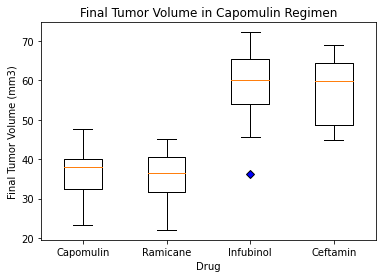

In [92]:
# Create the box plots for each top drug 


fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug")
blue_diamond= dict(markerfacecolor="b", marker="D")
ax1.boxplot(final_vol_top_drugs, labels=top_drugs, flierprops=blue_diamond)
plt.show()


In [93]:
# Line Plot for specific mouse (Capomulin)

# Create a Dataframe for Capomulin only

capomulin_df = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]

capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [94]:
# Grab one mouse data from Capomulin

cap_single_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]

cap_single_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [95]:
# Tumor volume vs. time point for that specific mouse 

cap_single_mouse = cap_single_mouse.loc[:,["Timepoint", "Tumor Volume (mm3)"]]

cap_single_mouse





,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


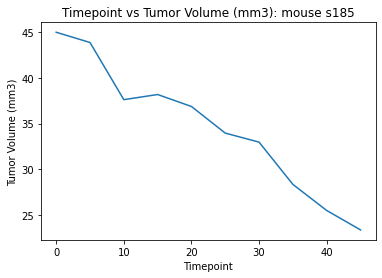

In [96]:
# Create a line plot for data

plt.plot(cap_single_mouse["Timepoint"], cap_single_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3): mouse s185")
plt.show()

In [97]:
# Mouse Weight vs Average Tumor Volume (Capomulin trearment)

weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

weight_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [98]:
# Find Average Tumor Volume for each mouse

cap_avg_vol =  pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

cap_avg_vol

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [99]:
cap_avg_vol = cap_avg_vol.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume"})

cap_avg_vol

,Mouse ID,Weight (g),Avg Tumor Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


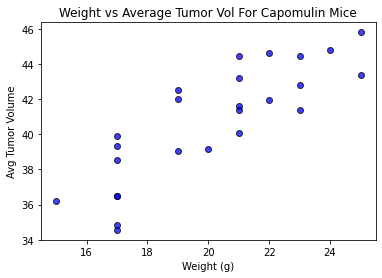

In [100]:
# Plot dataframe as a scatter plot

plt.scatter(cap_avg_vol["Weight (g)"], cap_avg_vol["Avg Tumor Volume"], marker="o", facecolors="b", edgecolors="black",
            alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume")
plt.title("Weight vs Average Tumor Vol For Capomulin Mice")
plt.show()





In [101]:
# Calculate correlation coefficient and linear regression model

mouse_weight = cap_avg_vol.iloc[:, 1]
avg_tumor_vol = cap_avg_vol.iloc[:, 2]
correlation= st.pearsonr(mouse_weight, avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.84


The r-squared is: 0.7089, 


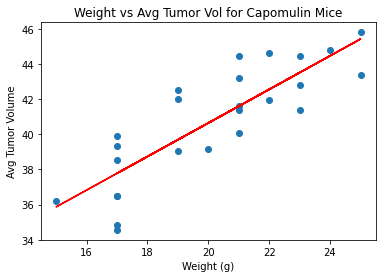

In [108]:
# Plot the linear regression line

x_values = mouse_weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume")
plt.title("Weight vs Avg Tumor Vol for Capomulin Mice")
print(f"The r-squared is: {rvalue**2:.4f}, ")
plt.show()



Observations and Insights

1. There seems to be a strong positive correlation between weight and average tumor volume of Capomulin.  The data shows that the heavier the mouse, the higher their average tumor volume typically is.

2. The IQR for Infubinol and Ceftamin are higher than the other two, which can be seen from both the IQR calculations but also the visualization of the box and whisker plot.  These two drugs also seem to have higher median tumor volume averages compared to the other two drugs, which shows that they are not performing as well as the other two drugs on the mice.

3. On the line plot that plots tumor volume vs time point, you can see that the Capomulin drug seems to be working on the mice.  From the line plot, you can see that at every increasing time point, the average tumor size of a specific mouse is decreasing which is a great thing.